In [ ]:
New Insurance Data (Linear Regression Model)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
insurance=pd.read_csv('/content/new insurance raw data.csv')

In [4]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [5]:
insurance.head(30)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.543130,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.674370,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.627590,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.393320,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.859410,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
5,18.0,male,34.430,0.0,no,26488.339120,20.0,717162.0,3.696161e+06,0.0,NaN,southeast,1137.46970
6,18.0,male,37.290,0.0,no,33217.365480,13.0,699159.0,8.765292e+05,0.0,6.906067e+07,southeast,1141.44510
7,18.0,male,41.140,0.0,no,46770.585330,12.0,706423.0,4.486741e+06,0.0,9.719378e+07,southeast,1146.79660
8,18.0,male,43.010,0.0,no,9715.650411,17.0,NaN,9.216440e+06,0.0,5.888197e+07,southeast,1149.39590
9,18.0,male,53.130,0.0,no,17046.585150,19.0,704425.0,1.458972e+06,0.0,9.426182e+07,southeast,1163.46270


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [8]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [9]:
insurance.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [10]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [11]:
col=list(insurance.columns)

In [12]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [13]:
type(col)

list

In [14]:
for col_name in col:
    if insurance[col_name].dtype== 'object':
      #print('ob')
      insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mode()[0])
    else:
      #print('num')
      insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mean())




In [15]:
insurance['smoker'].mode()

0    no
Name: smoker, dtype: object

In [16]:
insurance['smoker'].mode()[0]

'no'

In [17]:
insurance['children'].mean()

1.0907726931732933

In [18]:
insurance['age'].mean()

39.31000752445448

In [19]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [20]:
#seaborn

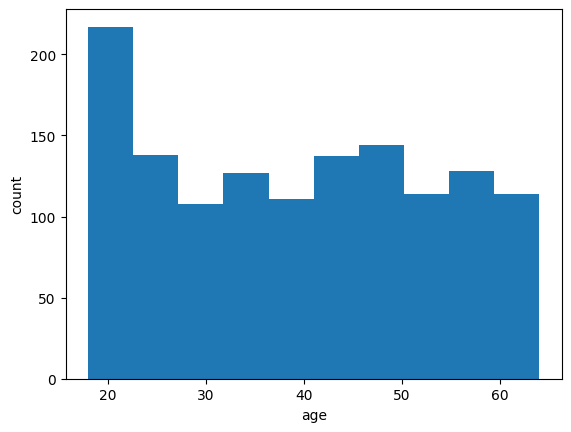

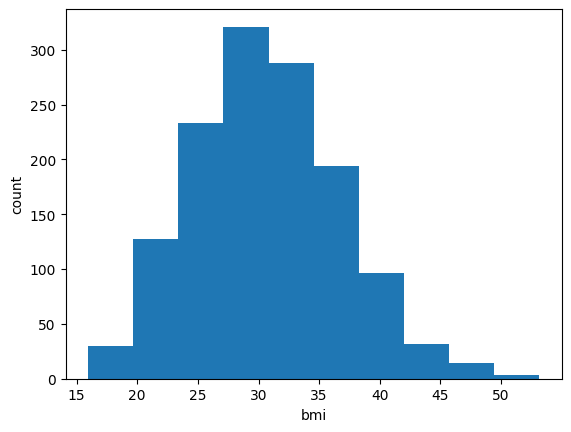

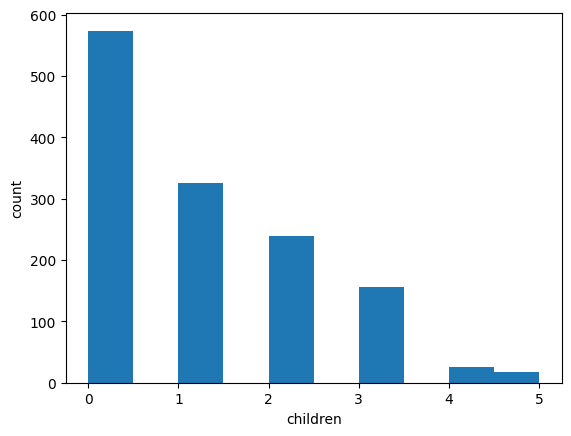

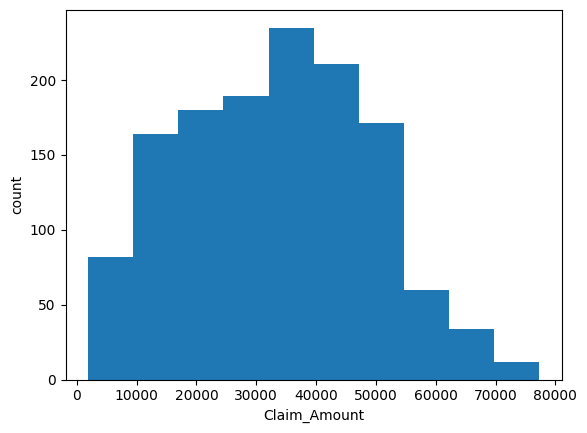

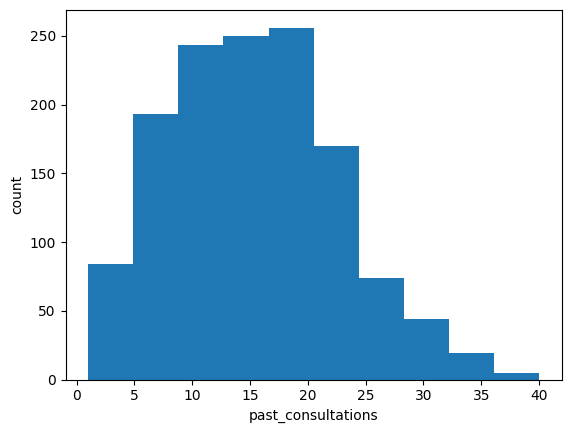

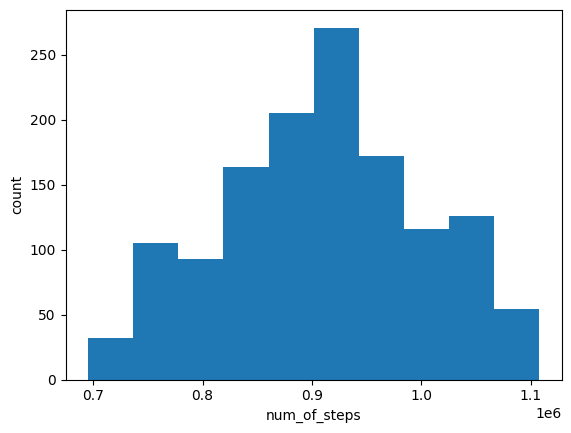

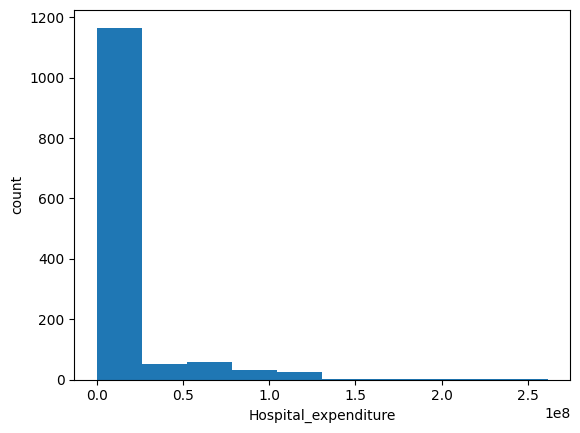

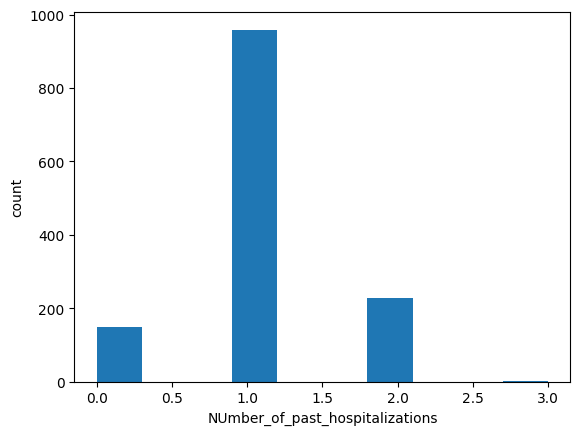

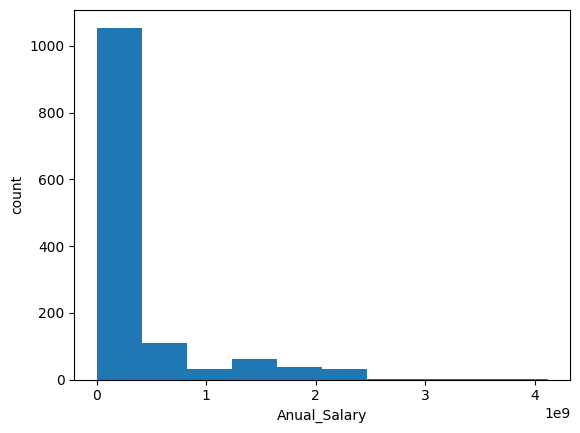

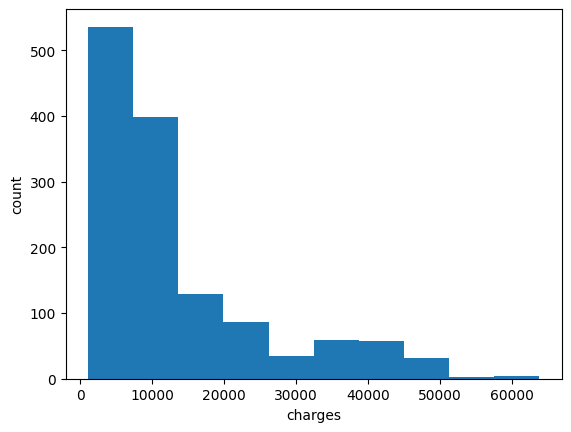

In [21]:
for col_name in col:
  if(insurance[col_name].dtypes== 'int64' or insurance[col_name].dtypes== 'float64'):
    plt.hist(insurance[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [22]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

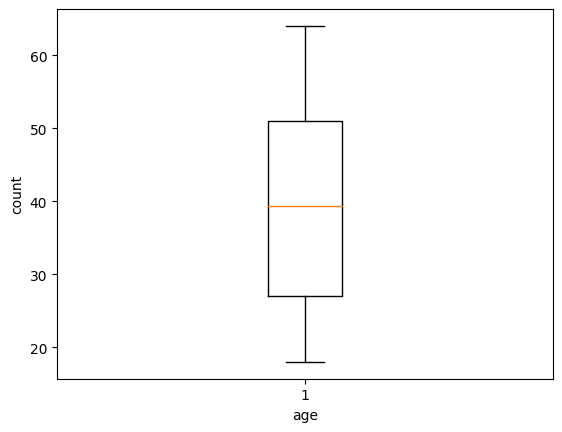

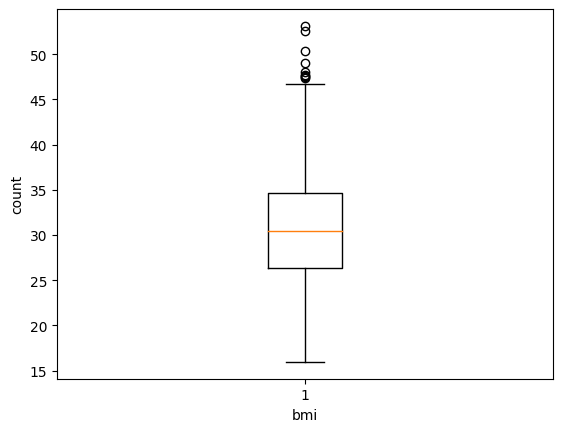

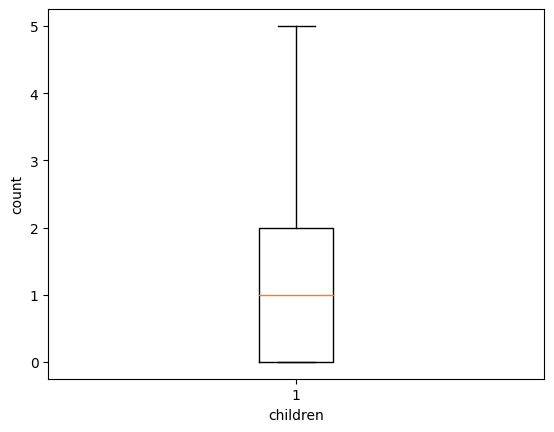

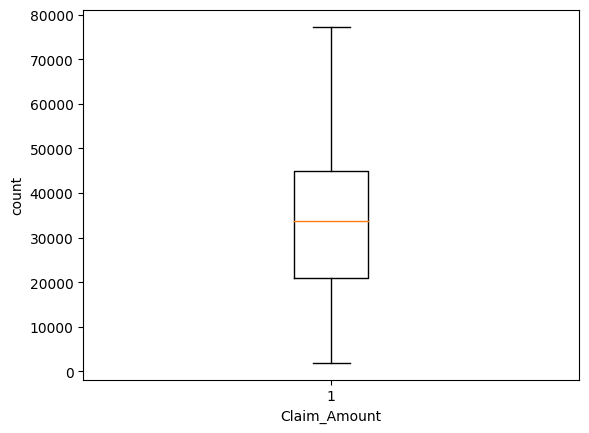

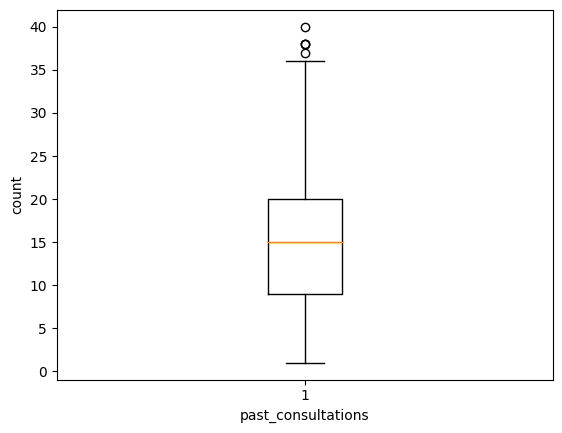

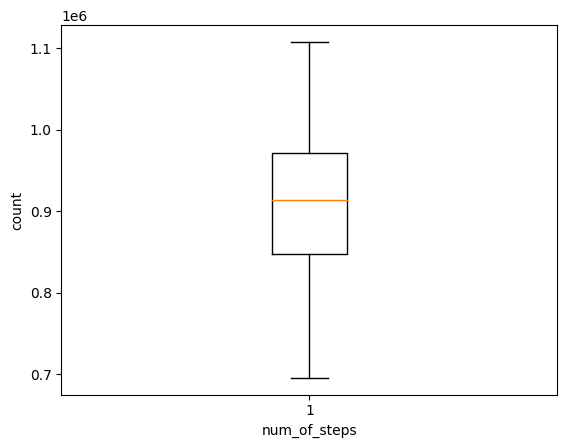

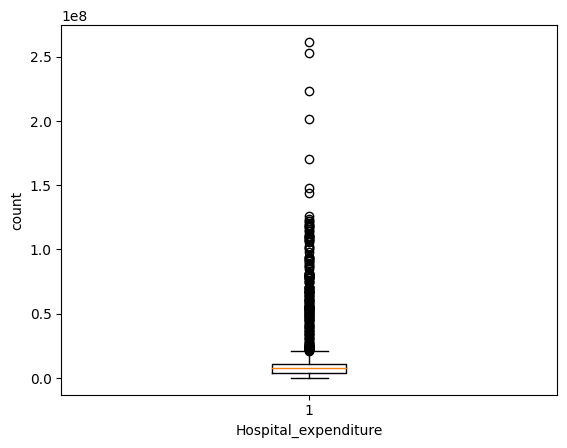

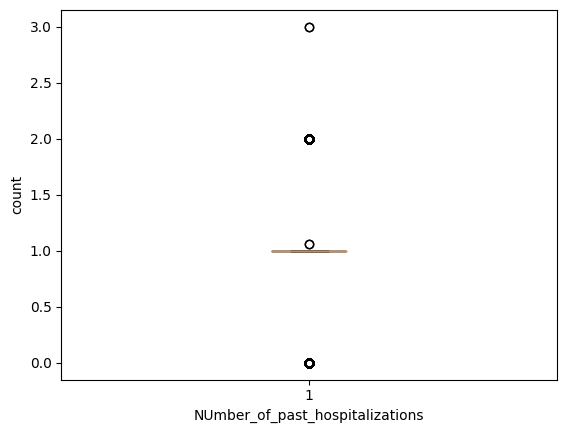

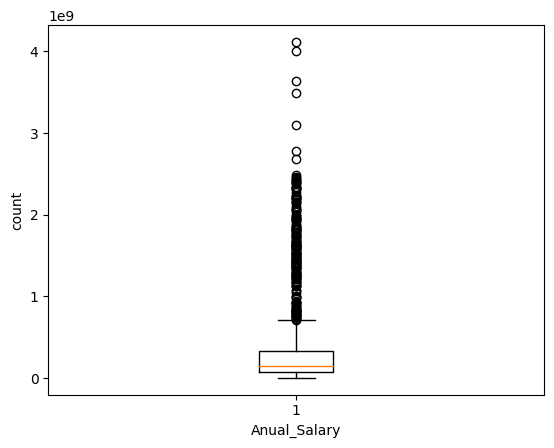

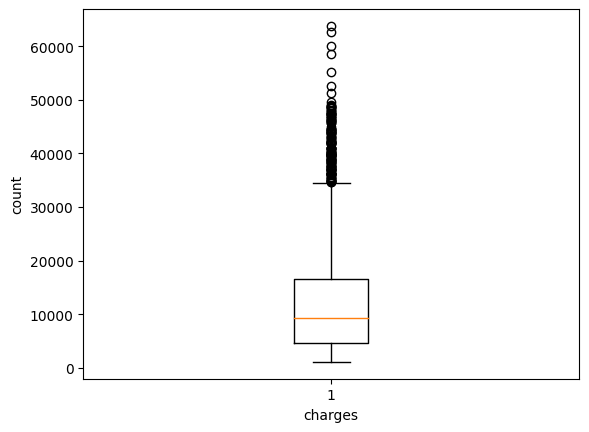

In [23]:
for col_name in col:
    if(insurance[col_name].dtypes== 'int64' or insurance[col_name].dtypes== 'float64'):
      plt.boxplot(insurance[col_name])
      plt.xlabel(col_name)
      plt.ylabel('count')
      plt.show()

In [24]:
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
#insurance[(insurance['sex']== 'male') & (insurance['smoker']=='no')]

In [27]:
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.bmi > Q1 - 1.5*IQR) & (insurance.bmi <= Q3 + 1.5*IQR)]

Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.past_consultations >= Q1 - 1.5*IQR) & (insurance.past_consultations <= Q3 + 1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1 - 1.5*IQR) & (insurance.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Anual_Salary >= Q1 -1.5*IQR) & (insurance.Anual_Salary <= Q3 + 1.5*IQR)]

In [28]:
insurance.shape

(1019, 13)

In [29]:
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.00000,1.019000e+03,1019.000000,1.019000e+03,1019.000000
mean,38.665152,30.142925,1.057364,30192.930331,12.980452,873341.37987,5.951521e+06,0.854819,1.256234e+08,7602.179601
std,14.037440,5.882322,1.207657,14315.677183,5.948466,68804.34981,3.188206e+06,0.352546,8.033918e+07,4355.551070
min,18.000000,15.960000,0.000000,1920.136268,1.000000,695430.00000,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,26.000000,25.900000,0.000000,17858.975705,8.000000,827083.50000,3.299624e+06,1.000000,6.610033e+07,3891.715625
50%,39.000000,29.920000,1.000000,30797.195830,13.000000,886052.00000,5.998037e+06,1.000000,1.074332e+08,7160.094000
75%,51.000000,34.055000,2.000000,41881.284570,18.000000,930204.00000,8.465968e+06,1.000000,1.727214e+08,11014.443300
max,64.000000,45.900000,5.000000,60712.925340,26.000000,994419.00000,1.665982e+07,1.060629,3.745310e+08,20234.854750


In [33]:
insurance.shape

(1019, 13)

In [34]:
#multi-collinearity == 5 or 6
#age, gender, dob, -----
#charges

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
     if ((insurance[col].dtypes != 'object') & (col != 'charges') ):   #only num cols except for the charges column
         col_list.append(col)

In [36]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [37]:
x = insurance[col_list]
x

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1041,24.0,27.600,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges') ):
    col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         VIF
0  15.801432
1  27.098574
2   2.028651
3   5.649513
4   6.249781
5  62.564152
6   5.149689
7  11.981339
8   5.581115


In [39]:
len(X.columns)

9

In [48]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'insurance' is your DataFrame

col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') and (col != 'charges')):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  15.801432
1                              bmi  27.098574
2                         children   2.028651
3                     Claim_Amount   5.649513
4               past_consultations   6.249781
5                     num_of_steps  62.564152
6             Hospital_expenditure   5.149689
7  NUmber_of_past_hospitalizations  11.981339
8                     Anual_Salary   5.581115


In [55]:
x=insurance.loc[:,['children','Claim_Amount', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']]
y=insurance.iloc[:,-1]

In [56]:
#age, date of birth, 10th_year, 12th_year, ---- anual expenditure of the customer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [57]:
#corelation
#age, gender, ----
#charges
#multi-colinearity== 5 or 6
#age, gender, dob, ---
#charges
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []

In [58]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(815, 5)
(815,)
(204, 5)
(204,)


In [60]:
l_model=LinearRegression()

In [61]:
l_model.fit(x_train, y_train)

LinearRegression()

In [62]:
prediction=l_model.predict(x_test)

In [63]:
prediction

array([ 6000.39720627,  5735.75511872,  3273.55929847, 11197.78016   ,
        1564.53026627,  1965.8040562 ,  5678.58904869,  8738.2315798 ,
        5453.80543331, 11996.2040557 ,  6156.76609241, 11968.92819848,
        3339.39502454, 12602.620574  , 13143.4669    ,  8326.34942879,
        8150.34051078,  7444.36811154,  6707.09457617,  2938.33592037,
        6657.79744837,  5999.48700352,  8750.29834072,  5294.32171757,
        5170.25145213,  3741.05368187,  3181.40014329,  8045.95059938,
        3163.63391868,  5963.71208201,  7772.35612499, 10465.58447742,
        9551.52537612,  6808.37273707,  5375.24018069,  7304.23300855,
        3180.44557979,  5207.02144603, 10089.58390704, 13920.74558912,
        8976.6040553 ,  5271.28883014,  4808.90435314,  1780.23498619,
       11333.03939802,  6445.12307595,  4624.01273622,  2770.83917798,
        4199.63082467,  5693.75343786, 12171.05472194, 11221.48656179,
        7574.17966966,  6415.49962291,  2806.3310606 , 17109.23192326,
      

In [65]:
import pandas as pd

error_pre = pd.DataFrame(columns=['Actual_data', 'Prediction_data'])

In [66]:
error_pre

,Actual_data,Prediction_data


In [69]:
import pandas as pd

# Assuming you've created error_pred DataFrame before assigning values to its columns
error_pred = pd.DataFrame()

# After creating the DataFrame, you can then assign values to its columns
error_pred['Actual_data'] = y_test

In [70]:
error_pred

,Actual_data
484,6746.74250
438,6184.29940
250,3761.29200
793,11326.71487
28,1622.18850
...,...
757,10796.35025
320,4562.84210
1032,18328.23810
633,8823.27900
